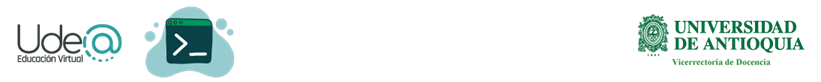

# Filtros aplicados sobre imágenes y señales

**Autores:**
*   Hernán Felipe García Arias, PhD.
*   Pablo Alejandro Alvarado Duran, PhD.
*   Cristian David Ríos Urrego, MSc.
*   Diana Patricia Tobon Vallejo, PhD.

**Laboratorio Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

---

# Filtrado de imágenes

- Este cuaderno muestra elementos fundamentales del **filtrado de imágenes**, y utiliza principalmente funciones del toolbox ``scikit-image`` ([documentación](https://scikit-image.org/)).

## Importar módulos de scikit-image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic # operaciones con color
import skimage.filters as skif # filtros
import skimage.data as skid # bases de datos (archivos de imágenes)
import skimage.util as sku # utilidades
%matplotlib inline

## Cargar y visualizar datos (imágenes)

In [2]:
# vamos a definir algunas funciones para mostrar resultados

def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap=plt.cm.gray) # usar pyplot biultin colormap gray
    ax.set_axis_off()
    plt.show()

def showPair(img,filt_img):
    fig, ax = plt.subplots(1, 2, figsize=(16, 16))
    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_axis_off()
    ax[1].imshow(filt_img, cmap=plt.cm.gray)
    ax[1].set_axis_off()
    plt.show()

Size:  (303, 384)


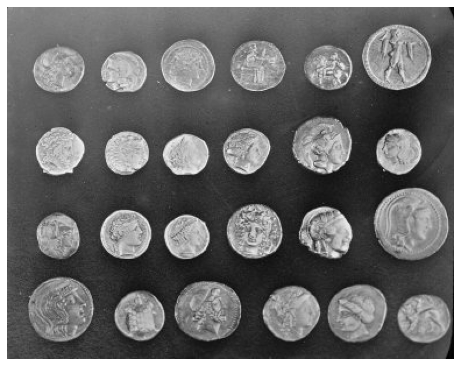

In [3]:
img =skid.coins() # alterar color imagen
print("Size: ",img.shape)
show(img)

## Filtros
En términos generales un filtro espacial corresponde a calcular la convolución entre un segmento (ventana) de los datos y una función preestablecida conocida como kernel


$$ \text{Imagen filtrada} = \text{Imagen original } \ast \text{ kernel}$$


La expresión anterior se puede definir matemáticamente como

$$g(x,y) = k \ast f(x,y) = \sum_{d_x =-a}^{a}\sum_{d_y =-b}^{b} k(d_x, d_y) \cdot f(x-d_x,y-d_y)$$

### Filtrado espacial

Definición en 2D de la convolución


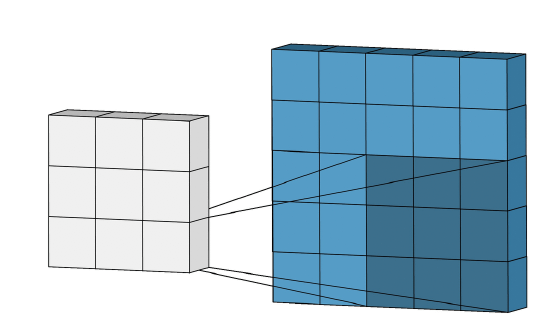

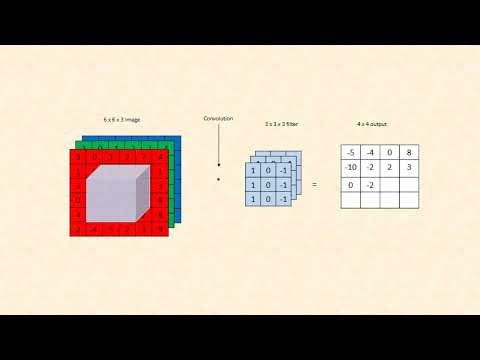

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('SG4i5_FAlr8', width=800, height=500)

La convolución se define para imágenes infinitamente grandes.

**Problema**
* Las imágenes son un arreglo finito de elementos, es decir, tienen límites o fronteras. El kernel no tiene soporte sobre los límites de los datos (imagen).


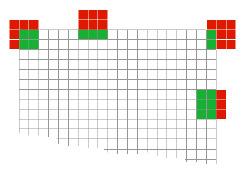

Hay diferentes maneras de solucionar este inconveniente:
- ignorar límites
- usar reflejo
- asumir valores constantes
- entre otras


### Filtro Gaussiano

[Gauss filter usage](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian)

El filtro Gaussiano es una técnica utilizada en procesamiento de imágenes para suavizar o difuminar la imagen. Este filtro se basa en la función de distribución normal (o gaussiana) y se utiliza comúnmente para reducir el ruido y los detalles finos en una imagen. También puede ser útil antes de aplicar otros filtros o técnicas de procesamiento de imágenes.

La operación del filtro Gaussiano implica convolucionar la imagen original con un kernel o máscara que sigue la forma de una función gaussiana bidimensional.

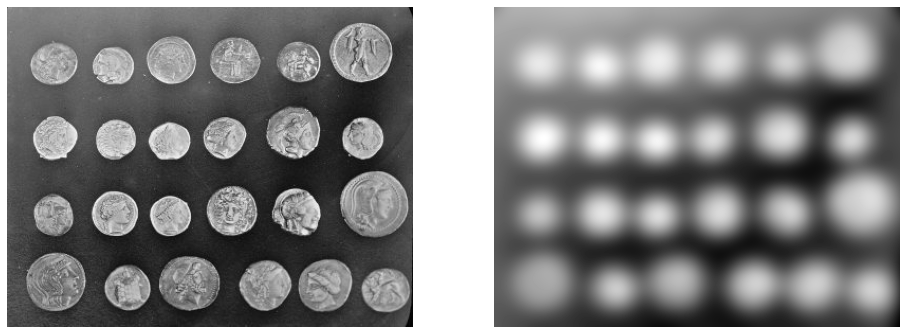

In [5]:
import matplotlib.pyplot as plt
imgLP_Gauss = skif.gaussian(img, 10)
showPair(img,imgLP_Gauss)

Las figuras anteriores muestran los resultados experimentales obtenidos. Se puede concluir que el kernel Gaussiano actúa como un filtro pasa-baja, produciendo imágenes más suaves (es su aplicación principal). Igualmente, es usado para reducción de ruido (condiciones de iluminación, cámaras de baja calidad, etc) y preprocesamiento para detección de bordes.


### Filtro Sobel

[Sobel filter usage](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel)

Este filtro aproxima el gradiente de la imagen (su derivada), por lo tanto, regiones con cambios abruptos serán resaltadas (bordes). El filtro Sobel consiste en dos máscaras o núcleos de convolución, uno para la detección de bordes horizontales y otro para la detección de bordes verticales.

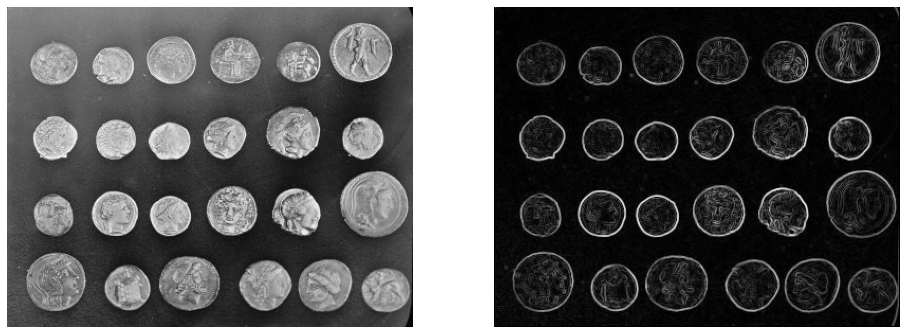

In [6]:
img = skimage.img_as_float(skid.coins())
sobimg = skif.sobel(img)
showPair(img,sobimg)

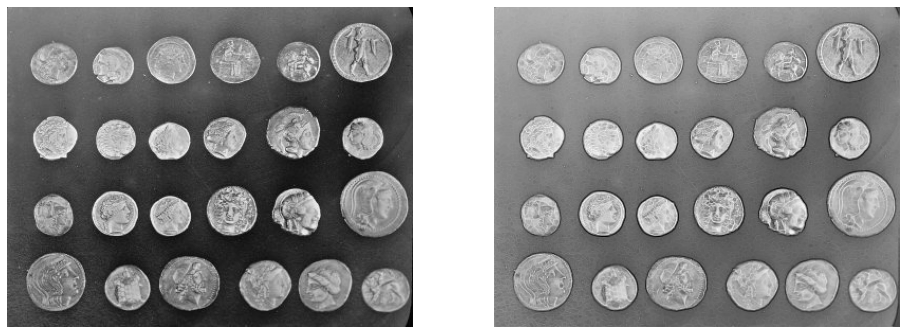

In [7]:
imgHP_AfterSmoothing = img - sobimg
showPair(img, imgHP_AfterSmoothing)

Además de su evidente funcionalidad de detección de bordes, el filtro Sobel es usado en diferentes aplicaciones como: extracción de características, preprocesamiento para algoritmos de reconocimiento, detección de líneas y contornos. 

### Filtros pasa-alta

- Los filtros pasa altas resaltan los cambios abruptos de intensidad entre valores/datos adyacentes en la imagen. Esto se conoce como bordes (edges en inglés).

- A continuación, vamos a umbralizar el resultado de aplicar el filtro sobel, para conservar cierta cantidad de bordes.

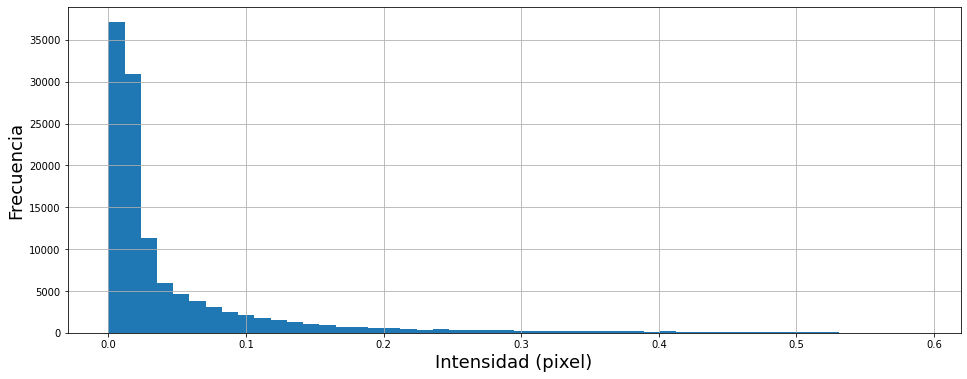

In [8]:
plt.figure(figsize=(16, 6))
plt.hist(sobimg.reshape(-1,1), bins=50);
plt.xlabel("Intensidad (pixel)",fontsize=18)
plt.ylabel("Frecuencia",fontsize=18)
plt.grid()

In [9]:
from ipywidgets import widgets

@widgets.interact(x=(0.0001, .6, .005))
def edge(x):
    show(sobimg < x)

interactive(children=(FloatSlider(value=0.2951, description='x', max=0.6, min=0.0001, step=0.005), Output()), …

## Reducción de ruido

Vamos a corromper los datos de la imagen con ruido Gaussiano $\mathcal{N}(0,\sigma^2)$



In [10]:
img2 = skid.coffee() # img_as_float: Convert an image to floating point format, with values in [0, 1].

print(f"valor máximo {img2.max()}, valor mínimo: {img2.min()}")

img2 = skimage.img_as_float(img2)
print(f"valor máximo {img2.max()}, valor mínimo: {img2.min()}")


valor máximo 255, valor mínimo: 0
valor máximo 1.0, valor mínimo: 0.0


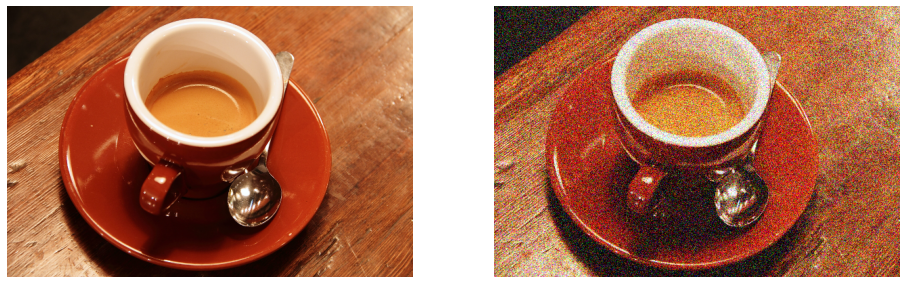

In [11]:
# adicionar ruido Gaussiano.
#img_n = sku.random_noise(img2)
img_n = sku.random_noise(img2, mean=0, var=0.05)

showPair(img2, img_n)

## Restauración de imágenes


El toolbox Scikit-image tiene diferentes enfoques para la restauración de imágenes ([image restoration](https://scikit-image.org/docs/dev/api/skimage.restoration.html) ).

A continuación exploramos el filtro [split-Bregman optimization.](https://scikit-image.org/docs/dev/api/skimage.restoration.html#skimage.restoration.denoise_tv_bregman)

El algoritmo de denoising mediante optimización de Split-Bregman es una técnica utilizada para reducir el ruido en imágenes. Este método se basa en la optimización de una función de energía que penaliza las diferencias entre los píxeles de la imagen original y los píxeles de la imagen denoised, con el objetivo de preservar las estructuras importantes mientras se suaviza el ruido.

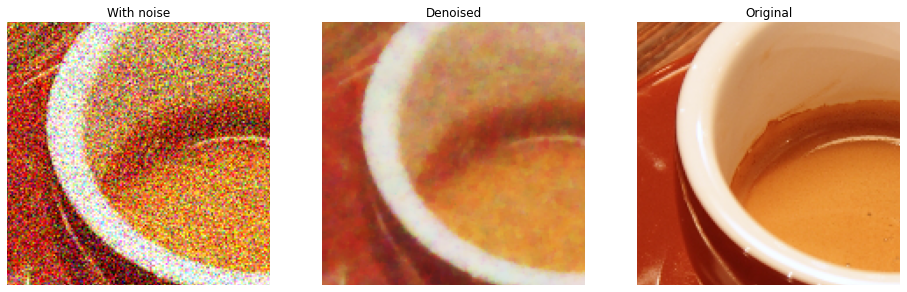

In [12]:
img_r = skimage.restoration.denoise_tv_bregman(img_n, 2)

fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(16, 12))

ax1.imshow(img_n)
ax1.set_title('With noise')
ax1.axis(ymin=200,ymax=50)
ax1.axis(xmin=150,xmax=300)
ax1.set_axis_off()


ax2.imshow(img_r)
ax2.set_title('Denoised')
ax2.axis(ymin=200,ymax=50)
ax2.axis(xmin=150,xmax=300)
ax2.set_axis_off()

ax3.imshow(img2)
ax3.set_title('Original')
ax3.axis(ymin=200,ymax=50)
ax3.axis(xmin=150,xmax=300)
ax3.set_axis_off()

# Filtrado de Señales


- En este parte, miraremos varias clases de filtros que se incluyen en la categoría de filtros IIR digitales (Filtros de respuesta infinita al impulso).

- Los filtros IIR a menudo se basan en filtros analógicos y su equivalente en el tiempo discreto. Se utilizan comúnmente en el procesamiento de audio digital, así como en sistemas de control y otras aplicaciones.

- Entonces, ¿qué hace realmente un filtro? Un filtro normalmente está diseñado para eliminar frecuencias particulares de una señal, ya sea en alguna forma de ecualizador de audio o en un sistema de control.

## Frecuencia de Nyquist

Antes de empezar recordemos un poco el concepto de la Frecuencia de Nyquist, la cual nos indica la frecuencia sugerida para muestrear una señal, con base en su frecuencia máxima.

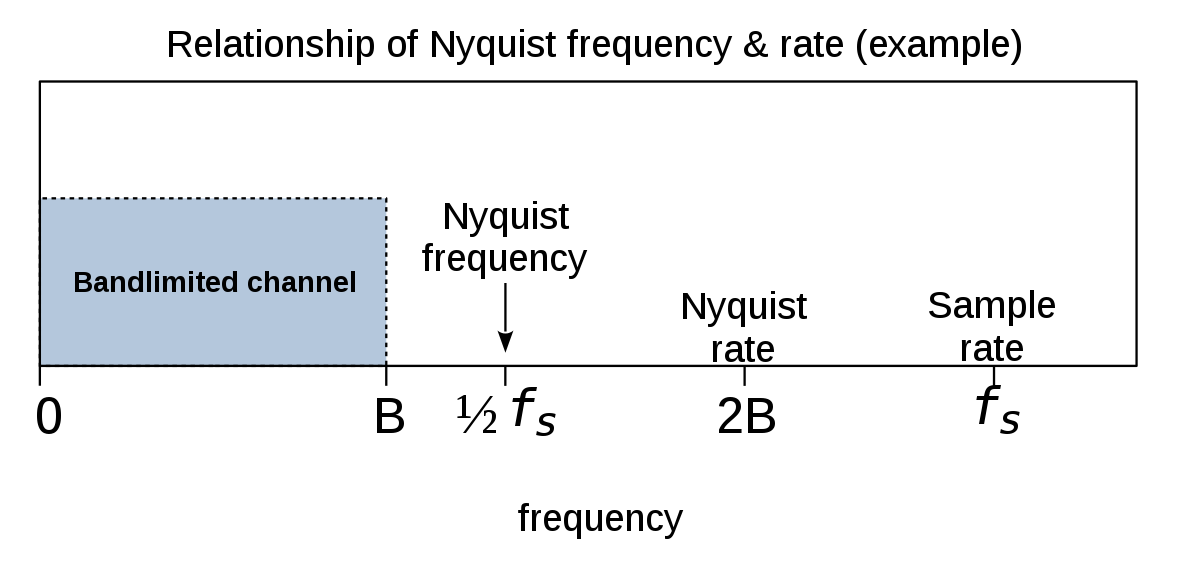

En resumen, el gráfico ilustra que para muestrear adecuadamente una señal en un canal con ancho de banda $B$, la tasa de muestreo $f_{s}$ debe ser al menos $2B$, lo que garantiza que la frecuencia de Nyquist sea $B$ (o superior), permitiendo una correcta representación de la señal sin aliasing.

# Ejemplo interactivo de filtros IIR

- El siguiente código muestra el uso de filtros usando ``Scipy``.

- Ejecute el siguiente código y navegue sobre los controles y la salidas se graficarán en las celdas.

- Puedes arrastrar los controles deslizantes y cambiar el tipo y la clase del filtro para explorar cómo estos parámetros afectan el procesamiento que hace el filtro a una señal de entrada.

In [2]:
from ipywidgets import interact
import matplotlib.pylab as plt
import numpy as np
import scipy.signal
%matplotlib inline

@interact(cutoff=(0.005, 9.9, 1), bandType=["lowpass", "highpass"],
          filterClass=["butterworth",
                       "chebyshev1",
                       "chebyshev2",
                       "elliptic",
                       "bessel"], order=(1, 10, 1))

def filterBuffer(cutoff, bandType, filterClass, order):
    # Construimos una señal de prueba
    NUM_SAMPLES = 200
    SAMPLE_RATE = 44100
    sampleRange = np.linspace(0, 1, NUM_SAMPLES)
    f1 = 1e3
    f2 = 11e3
    f3 = 20e3
    buffer = np.sin(sampleRange*2*np.pi*f1) + \
             np.sin(sampleRange*2*np.pi*f2) + \
             np.sin(sampleRange*2*np.pi*f3)

    plt.figure(figsize=(15, 3))

    # Graficamos la señal de entrada
    plt.subplot(1, 3, 1)
    plt.plot(sampleRange, buffer)
    plt.ylim(bottom=-3, top=3)
    plt.title("Filter Input")
    plt.xlabel("Samples")
    plt.ylabel("Displacement")
    plt.xlim([0.4, 0.7])

    # Calculamos los coeficientes del filtro seleccionado para una determinada
    # frecuencia de corte y aplicamos el filtrado
    if filterClass == "butterworth":
        b, a = scipy.signal.butter(order, cutoff / 10.0, btype=bandType,
                                   analog=False)

    elif filterClass == "chebyshev1":
        b, a = scipy.signal.cheby1(order, 0.5, cutoff / 10.0, btype=bandType,
                                   analog=False)

    elif filterClass == "chebyshev2":
        b, a = scipy.signal.cheby2(order, 20, cutoff / 10.0, btype=bandType,
                                   analog=False)

    elif filterClass == "elliptic":
        b, a = scipy.signal.ellip(order, 0.5, 20, cutoff / 10.0, btype=bandType,
                                  analog=False)

    elif filterClass == "bessel":
        b, a = scipy.signal.bessel(order, cutoff / 10.0, btype=bandType,
                                   analog=False)

    buffer = scipy.signal.lfilter(b, a, buffer)

    # Calculamos la respuesta en frecuencia
    angularFreq, response = scipy.signal.freqz(b, a, worN=8000)
    print(len(angularFreq))
    # Graficamos la señal filtrada y la respuesta en frecuencia
    plt.subplot(1, 3, 2)
    plt.plot(0.5 * SAMPLE_RATE * angularFreq / np.pi, np.abs(response))
    plt.xlim(0, 0.5 * SAMPLE_RATE)
    plt.title("Filter Frequency Response")
    plt.xlabel("Frequency (Hz)")

    plt.subplot(1, 3, 3)
    plt.plot(sampleRange, buffer)
    plt.ylim(bottom=-3, top=3)
    plt.xlim([0.4, 0.7])
    plt.title("Filter Output")
    plt.xlabel("Samples")
    plt.ylabel("Displacement")

    plt.show()

ModuleNotFoundError: No module named 'ipywidgets'

## Tipos de Filtros
La clase de un filtro determina varias propiedades:
- La ondulación en las bandas de paso o de rechazo
- La pendiente de la transición entre la banda de paso y la banda de parada.

Se debe tener en cuenta que la clase de un filtro es independiente de su orden o frecuencia de corte. Algunas clases de filtro de uso común incluyen:

- **Butterworth:** Logra la atenuación más pronunciada sin introducir ondulación de banda de paso o banda de parada.

- **Chebyshev:** Logra una atenuación mucho más pronunciada que el filtro Butterworth a costa de introducir algo de ondulación de banda de paso o de banda de parada, según la configuración.

- **Elíptica:** caída aún más pronunciada que la del filtro Chebyshev, a costa de introducir ondulación tanto en las bandas de paso como en las bandas de parada.

- **Bessel:** caída muy lenta, pero respuesta de fase lineal y retraso de grupo plano en la banda de paso que puede ser importante para ciertas aplicaciones

## Orden de un filtro
- Un filtro de primer orden sería la implementación más simple de una clase de filtro, requiriendo la menor cantidad de componentes (o cálculos si es digital).

- Un orden bajo representa menos cálculos, pero tiene como consecuencia generar un filtro con bajo rendimiento (ondulación o velocidad de transición entre banda de paso y banda de parada).

- Un filtro de orden superior necesitaría más componentes o cálculos, pero lograría una caída más pronunciada.



### Referencias

1. https://en.wikipedia.org/wiki/Total_variation_denoising2
2. Tom Goldstein and Stanley Osher, “The Split Bregman Method For L1 Regularized Problems”, ftp://ftp.math.ucla.edu/pub/camreport/cam08-29.pdf3
3. Pascal Getreuer, “Rudin–Osher–Fatemi Total Variation Denoising using Split Bregman” in Image Processing On Line on 2012–05–19,
4. https://www.ipol.im/pub/art/2012/g-tvd/article_lr.pdf4 https://web.math.ucsb.edu/~cgarcia/UGProjects/BregmanAlgorithms_JacquelineBush.pdf
5. P. Prandoni and M. Vetterli, *Signal Processing for Communications*, ser. Communication and information sciences. CRC Press, 2008.

---

# Trabajo de Laboratorio (Filtrado de imágenes)

El ruido es un factor importante que dificulta el análisis de las señales. Por lo tanto, muchas aplicaciones de tratamiento de señales requieren de una etapa preliminar que limpie los datos (filtrado), y que además realce determinadas propiedades de las señales, como por ejemplo hacer más evidentes los bordes de una imagen.

- Con el propósito de entender cómo diferentes tipos y niveles de ruido afectan diferentes imágenes, escoja 2 imágenes de interés en escala de grises y a color (puede usar la librería skimage.data o incluso trabajar con los datos de su proyecto -si aplica-). Luego, vamos a contaminar cada imagen con diferentes tipos y niveles de ruido, específicamente utilizaremos estos cuatro tipos de ruido:
    1. Ruido Gaussiano
    2. Ruido de Poisson
    3. Ruido de sal y pimienta
    
    **Nota:** Estos tipos de ruido están implementados en la librería [SKIMAGE](https://scikit-image.org/docs/dev/api/skimage.util.html). Interprete los resultados y analice qué tipo de efecto tiene cada ruido sobre las imágenes.


- Para cada imagen grafique (en un subplot) la señal original vs. las señales contaminadas. ¿Qué puede concluir? ¿Qué parámetros debe modificar en las funciones de la librería SKIMAGE?, de una pequeña explicación de cada uno.


- Utilice las siguientes estrategias de filtrado para las cuales se requiere que varíe los parámetros propios de cada método (filtro) y evalúe la relación señal a ruido ([SNR](https://scikit-image.org/docs/dev/api/skimage.metrics.html#skimage.metrics.peak_signal_noise_ratio)). Las estrategias de filtrado a utilizar son:

    1. Filtro Gaussiano
    2. Filtro de Mediana
    3. Filtro Butterworth


- Compare las imágenes restauradas (obtenidas) respecto a las originales (sin ruido), qué filtros y qué valores de sus parámetros producen reconstrucciones más precisas?. Explique su respuesta.
    

## Trabajo de laboratorio (Filtrado de señales)

1. Descargue un archivo de audio de su elección (voz, música, sonidos de pájaros, etc) y carguelo en el notebook. Analice los primeros 5 segundos de grabación (asegúrese que no sea ni un silencio ni ruido), grafique:

 - Forma de onda (serie de tiempo)
 - Transformada de Fourier
 - Espectrograma
 - Reproduzca en el altavoz el sonido cargado

 A partir de esta información describa el contenido de frecuencia de la señal:
 - ¿Cómo se distribuye la energía de la señal en las bandas de frecuencia?

 - ¿Cómo cambia, con respecto al tiempo, la distribución de energía de la señal (ver espectrograma)?

2. A continuación, escoja una frecuencia de corte (Fc) que afecte de manera significativa a la señal, y úsela como parámetro de diseño para un filtro pasa-baja, y luego para un filtro pasa-alta. Para ambos filtros observe la salida (señal filtrada) utilizando de nuevo:

- Forma de onda (serie de tiempo)
- Transformada de Fourier
- Espectrograma
- Reproduzca en el altavoz el sonido filtrado  

 Compare las señales antes y después de ser filtradas. ¿Qué conclusiones puede sacar de esta comparación?

**Nota:** Escoja libremente el tipo de filtro (Butterworth, Chebyshev, Elíptico, y Bessel), garantizando que como **mínimo** sea de orden 6.